# *Exploratory Data Analysis (EDA)*


### **📥 Import Libraries and Setup**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix

 ### **📂 Load and Validate Dataset**

In [3]:
# Load the updated dataset
file_path = r"D:\Desktop\DS\ds\1-cleaning\cleaned_traffic_data.csv"
if not os.path.exists(file_path):
    raise FileNotFoundError(f"The file '{file_path}' was not found in the current directory: {os.getcwd()}")

incidents_data = pd.read_csv(file_path)

# Ensure necessary columns are present
if 'Timestamp' not in incidents_data.columns:
    raise KeyError("The column 'Timestamp' is missing from the dataset.")


### **🧭 Extract Time Components from Timestamp**

In [4]:
# Convert 'Timestamp' to datetime and extract time components
incidents_data['IncidentDate'] = pd.to_datetime(incidents_data['Timestamp'], errors='coerce')
incidents_data['Year'] = incidents_data['IncidentDate'].dt.year
incidents_data['Month'] = incidents_data['IncidentDate'].dt.month
incidents_data['Day'] = incidents_data['IncidentDate'].dt.day
incidents_data['Hour'] = incidents_data['IncidentDate'].dt.hour
incidents_data['Weekday'] = incidents_data['IncidentDate'].dt.day_name()


### **📅 Number of Accidents by Day in March**

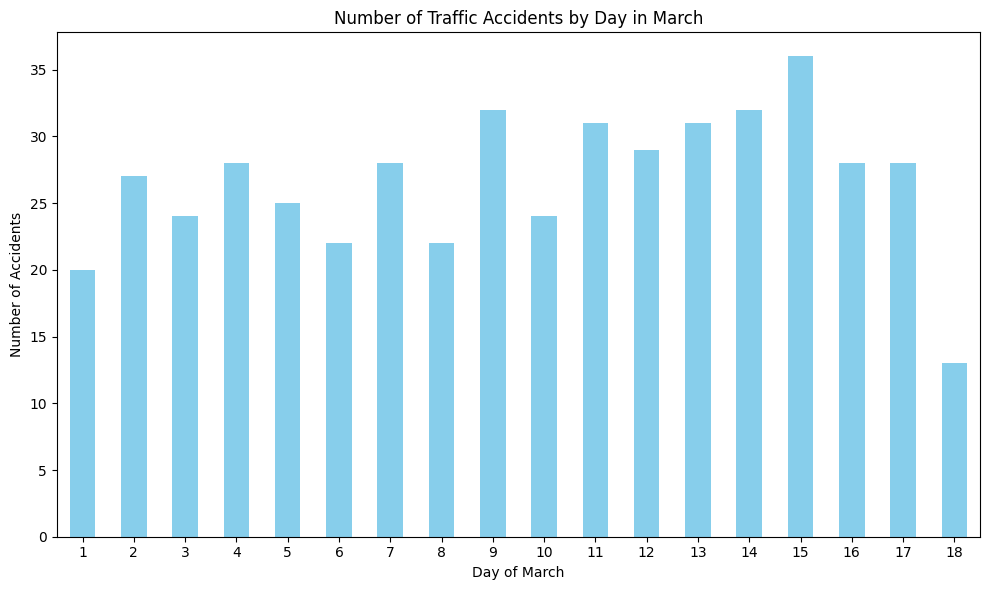

In [5]:
# 1. عدد الحوادث كل يوم في شهر مارس
march_accidents = incidents_data[(incidents_data['Accident_Report'] > 0) & (incidents_data['Month'] == 3)]
accident_by_day = march_accidents['Day'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
accident_by_day.plot(kind='bar', color='skyblue')
plt.title('Number of Traffic Accidents by Day in March')
plt.xlabel('Day of March')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#  Analysis based on environmental factors


### **🌦️ Accidents by Weather Condition**

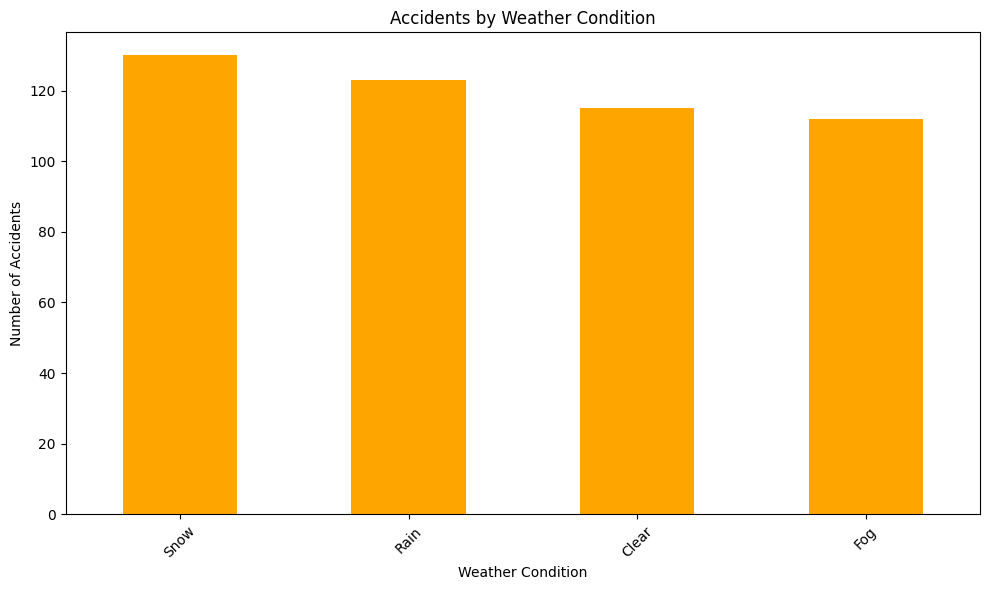

In [6]:
# Distribution of accidents by weather condition
plt.figure(figsize=(10, 6))
weather_accidents = incidents_data[incidents_data['Accident_Report'] > 0]['Weather_Condition'].value_counts()
weather_accidents.plot(kind='bar', color='orange')
plt.title('Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **🚦 Accidents by Traffic Light State**

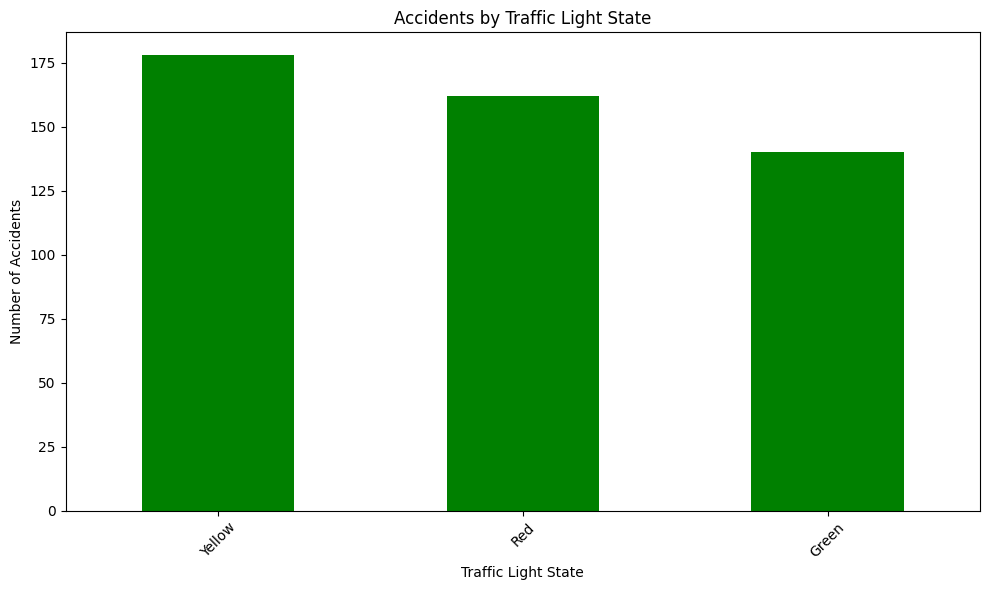

In [7]:
# Accidents by traffic light state
plt.figure(figsize=(10, 6))
light_accidents = incidents_data[incidents_data['Accident_Report'] > 0]['Traffic_Light_State'].value_counts()
light_accidents.plot(kind='bar', color='green')
plt.title('Accidents by Traffic Light State')
plt.xlabel('Traffic Light State')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### **📈 Average Traffic Speed on Accident Days by Weekday**

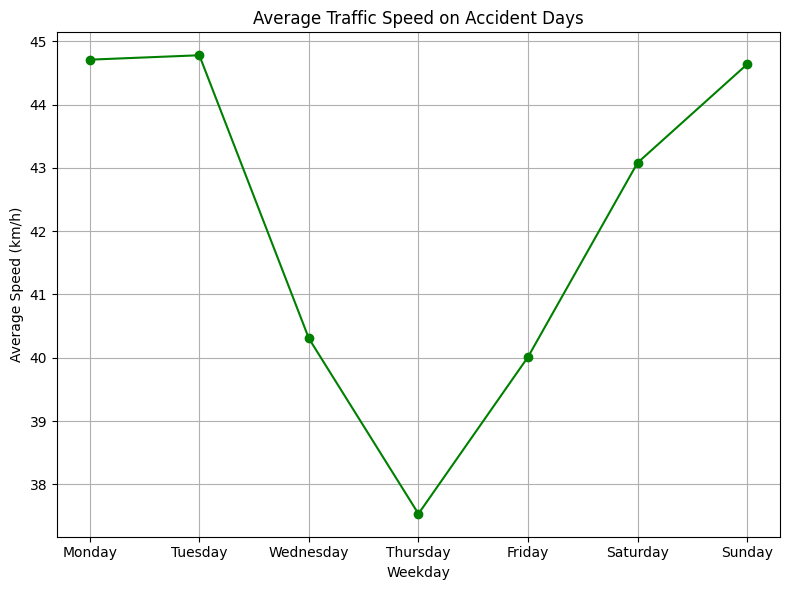

In [8]:
#معدل السرعة في الأيام التي بها حوادث
avg_speed = incidents_data[incidents_data['Accident_Report'] > 0].groupby('Weekday')['Traffic_Speed_kmh'].mean()
avg_speed = avg_speed.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(8, 6))
avg_speed.plot(kind='line', marker='o', color='green')
plt.title('Average Traffic Speed on Accident Days')
plt.xlabel('Weekday')
plt.ylabel('Average Speed (km/h)')
plt.grid(True)
plt.tight_layout()
plt.show()


# Diagnostic Analysis

### **📊 Correlation Heatmap of Numeric Traffic Features**

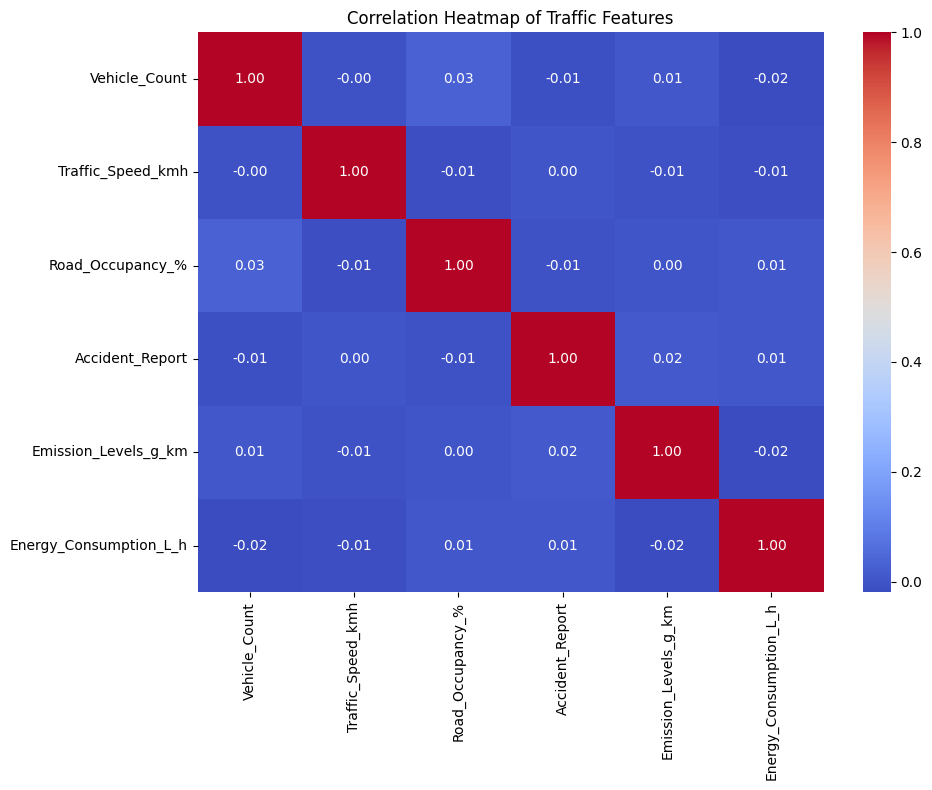

In [9]:
# تحويل الأعمدة الرقمية
cols_to_numeric = ['Vehicle_Count', 'Traffic_Speed_kmh', 'Road_Occupancy_%',
                   'Accident_Report', 'Emission_Levels_g_km', 'Energy_Consumption_L_h']
for col in cols_to_numeric:
    incidents_data[col] = pd.to_numeric(incidents_data[col], errors='coerce')

# 1. heatmap للعلاقة بين المتغيرات الرقمية
plt.figure(figsize=(10, 8))
sns.heatmap(incidents_data[cols_to_numeric].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Traffic Features')
plt.tight_layout()
plt.show()

### **📦 Boxplots of Key Features vs Accident Report**

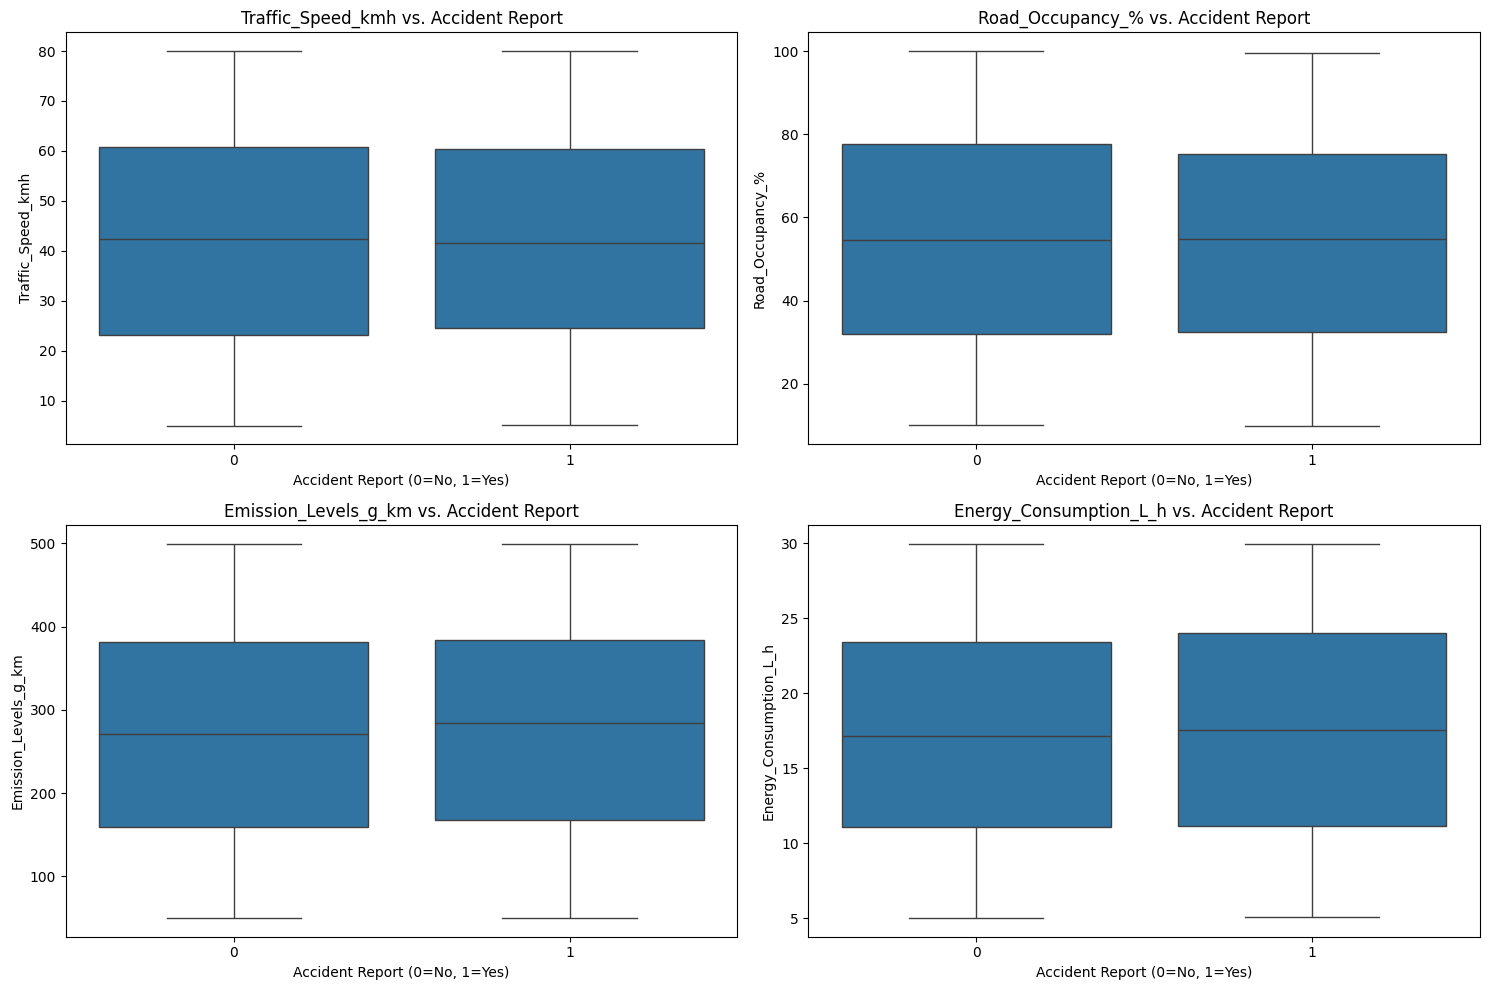

In [10]:


# قائمة المتغيرات التي نريد تحليلها مقابل الحوادث
variables = ['Traffic_Speed_kmh', 'Road_Occupancy_%', 'Emission_Levels_g_km', 'Energy_Consumption_L_h']

# رسم boxplots لكل متغير
plt.figure(figsize=(15, 10))

for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=incidents_data, x='Accident_Report', y=var)
    plt.title(f'{var} vs. Accident Report')
    plt.xlabel('Accident Report (0=No, 1=Yes)')
    plt.ylabel(var)

plt.tight_layout()
plt.show()


### **📊 Scatter Plot: Vehicle Count vs Accident Report (Sample)**

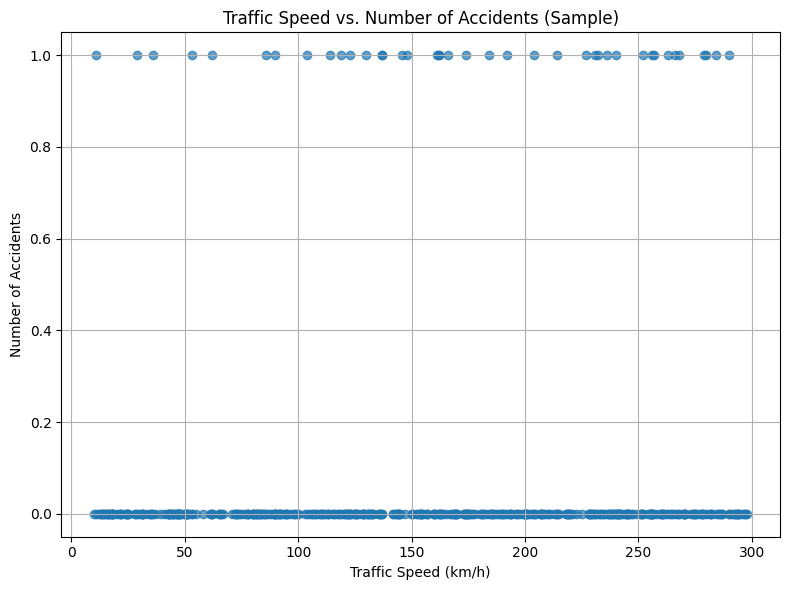

Correlation between Traffic Speed and Number of Accidents: -0.01


In [11]:
sample_data = incidents_data.sample(n=500, random_state=1)

plt.figure(figsize=(8, 6))
plt.scatter(sample_data['Vehicle_Count'], sample_data['Accident_Report'], alpha=0.7)
plt.title('Traffic Speed vs. Number of Accidents (Sample)')
plt.xlabel('Traffic Speed (km/h)')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.tight_layout()
plt.show()
correlation = incidents_data['Vehicle_Count'].corr(incidents_data['Accident_Report'])
print(f"Correlation between Traffic Speed and Number of Accidents: {correlation:.2f}")


### **🧪 Accident Rate by Speed Range**

C:\Users\YB Store\AppData\Local\Temp\ipykernel_22644\377009497.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  speed_groups = incidents_data.groupby('Speed_Bin')


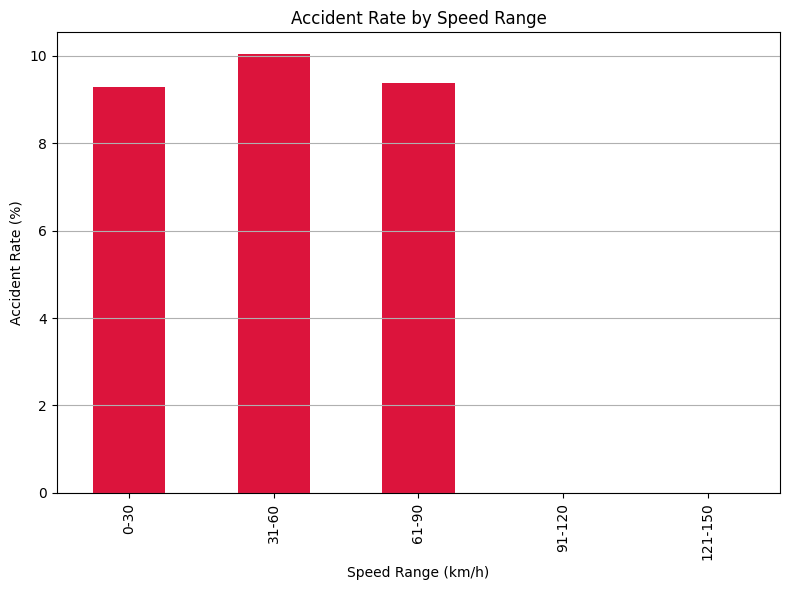

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. إنشاء عمود جديد لفئات السرعة
bins = [0, 30, 60, 90, 120, 150]
labels = ['0-30', '31-60', '61-90', '91-120', '121-150']
incidents_data['Speed_Bin'] = pd.cut(incidents_data['Traffic_Speed_kmh'], bins=bins, labels=labels)

# 2. حساب نسبة الحوادث في كل فئة سرعة
speed_groups = incidents_data.groupby('Speed_Bin')

# عدد السجلات في كل فئة
total_counts = speed_groups.size()

# عدد الحوادث في كل فئة
accident_counts = speed_groups['Accident_Report'].apply(lambda x: (x > 0).sum())

# النسبة المئوية للحوادث في كل فئة
accident_rate = (accident_counts / total_counts) * 100

# 3. رسم النتائج
plt.figure(figsize=(8, 6))
accident_rate.plot(kind='bar', color='crimson')
plt.title('Accident Rate by Speed Range')
plt.xlabel('Speed Range (km/h)')
plt.ylabel('Accident Rate (%)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### **📊 Distribution of Traffic Speed Before and After Outlier Removal**

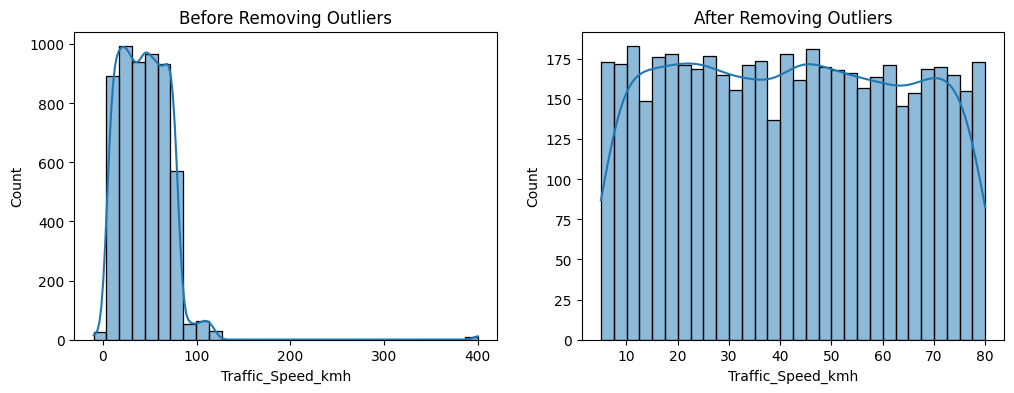

In [13]:

df_raw = pd.read_csv(r'D:\Desktop\DS\ds\1-cleaning\traffic accident.csv')
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df_raw['Traffic_Speed_kmh'], bins=30, kde=True, ax=ax[0])
ax[0].set_title("Before Removing Outliers")
sns.histplot(incidents_data['Traffic_Speed_kmh'], bins=30, kde=True, ax=ax[1])
ax[1].set_title("After Removing Outliers")
plt.show()
